In [ ]:
counts_dir = input('counts_dir, such as path/to/decontamination/contamination_counts/eval_all'

In [ ]:
import pandas as pd
import os
import json

for subdir in os.listdir(counts_dir):
    paths = !find {counts_dir+subdir} -name counts.json
    print(paths)

In [4]:
import pandas as pd
import os
import json

# make df where ngam_n is a column, each key is a subcolumn, and each value is a row
full_df = {}
for subdir in os.listdir(counts_dir):
    paths = !find {counts_dir+subdir} -name counts.json
    if paths == []:
        continue
    combined = {}
    for path in paths:
        ngram_n = "13gram" if "13gram" in path.split('/')[-2] else ("8gram" if "8gram" in path.split('/')[-2] else "unknown-gram")
        raw_data = pd.DataFrame(json.load(open(path)))        
        any_ngram = raw_data['any_ngram_per_source'] / raw_data['total_docs_per_source']
        docs_with_removal = raw_data['docs_with_removal_per_source'] / raw_data['total_docs_per_source']
        # new df from these two series and  columns=['any', '70%']
        normalized_data = pd.DataFrame({'any': any_ngram, '70%': docs_with_removal})
        combined[ngram_n] = normalized_data
    # print(combined['13gram'])
    combined_df = pd.concat(combined, axis=1)
    full_df[subdir] = combined_df
    # print(combined_df)
full_df = pd.concat(full_df, axis=1)
full_df

against_c4_train                                \
                          13gram               8gram             
                             any       70%       any       70%   
c4_100_domains          1.000000  1.000000  1.000000  1.000000   
four_chan               0.335117  0.000594  0.720864  0.000878   
m2d2_s2orc              0.044821  0.001100  0.385690  0.002378   
m2d2_wiki               0.484022  0.031663  0.886056  0.048258   
twitterAAE_helm         0.014916  0.003726  0.097868  0.012109   
manosphere              0.139746  0.000905  0.636878  0.001756   
mc4                     0.576594  0.016821  0.908379  0.028944   
c4_en                   0.592146  0.067206  0.945031  0.113242   
gab                     0.055698  0.004655  0.389083  0.016959   
ice                     0.727273  0.000970  0.995636  0.001212   
pile                    0.564875  0.063135  0.920646  0.075149   
wikitext_103            0.933333  0.058333  0.991667  0.100000   

                against_c4_train_bff_paragraph_defualts_decon_eval_all  \
                                                                13gram   
                                                                   any   
c4_100_domains                                            0.009632       
four_chan                                                 0.009485       
m2d2_s2orc                                                0.000022       
m2d2_wiki                                                 0.001786       
twitterAAE_helm                                           0.000400       
manosphere                                                0.003167       
mc4                                                       0.010029       
c4_en                                                     0.008653       
gab                                                       0.000766       
ice                                                       0.002424       
pile                                                      0.008063       
wikitext_103                                              0.016667       

                                               \
                              8gram             
                      70%       any       70%   
c4_100_domains        NaN  0.702755  0.000006   
four_chan        0.000004  0.416650  0.000022   
m2d2_s2orc       0.000002  0.054449  0.000113   
m2d2_wiki             NaN  0.328496  0.000049   
twitterAAE_helm  0.000100  0.028273  0.001778   
manosphere       0.000011  0.363743  0.000104   
mc4              0.000017  0.545863  0.000051   
c4_en            0.000016  0.547605  0.000112   
gab              0.000057  0.087245  0.000809   
ice                   NaN  0.675394       NaN   
pile             0.000002  0.502150  0.000172   
wikitext_103          NaN  0.775000       NaN   

                against_c4_train_exact_doc_decon_eval_all                      \
                                                   13gram               8gram   
                                                      any       70%       any   
c4_100_domains                                   0.720817  0.012546  0.998427   
four_chan                                        0.330250  0.000585  0.720262   
m2d2_s2orc                                       0.043754  0.001094  0.384735   
m2d2_wiki                                        0.479385  0.029416  0.885578   
twitterAAE_helm                                  0.014966  0.003726  0.097878   
manosphere                                       0.136979  0.000895  0.636600   
mc4                                              0.573300  0.016670  0.908181   
c4_en                                            0.589233  0.067094  0.944823   
gab                                              0.055448  0.004635  0.388732   
ice                                              0.701818  0.000970  0.993455   
pile                                             0.560570  0.061255  0.920138   
wikitext_103                                

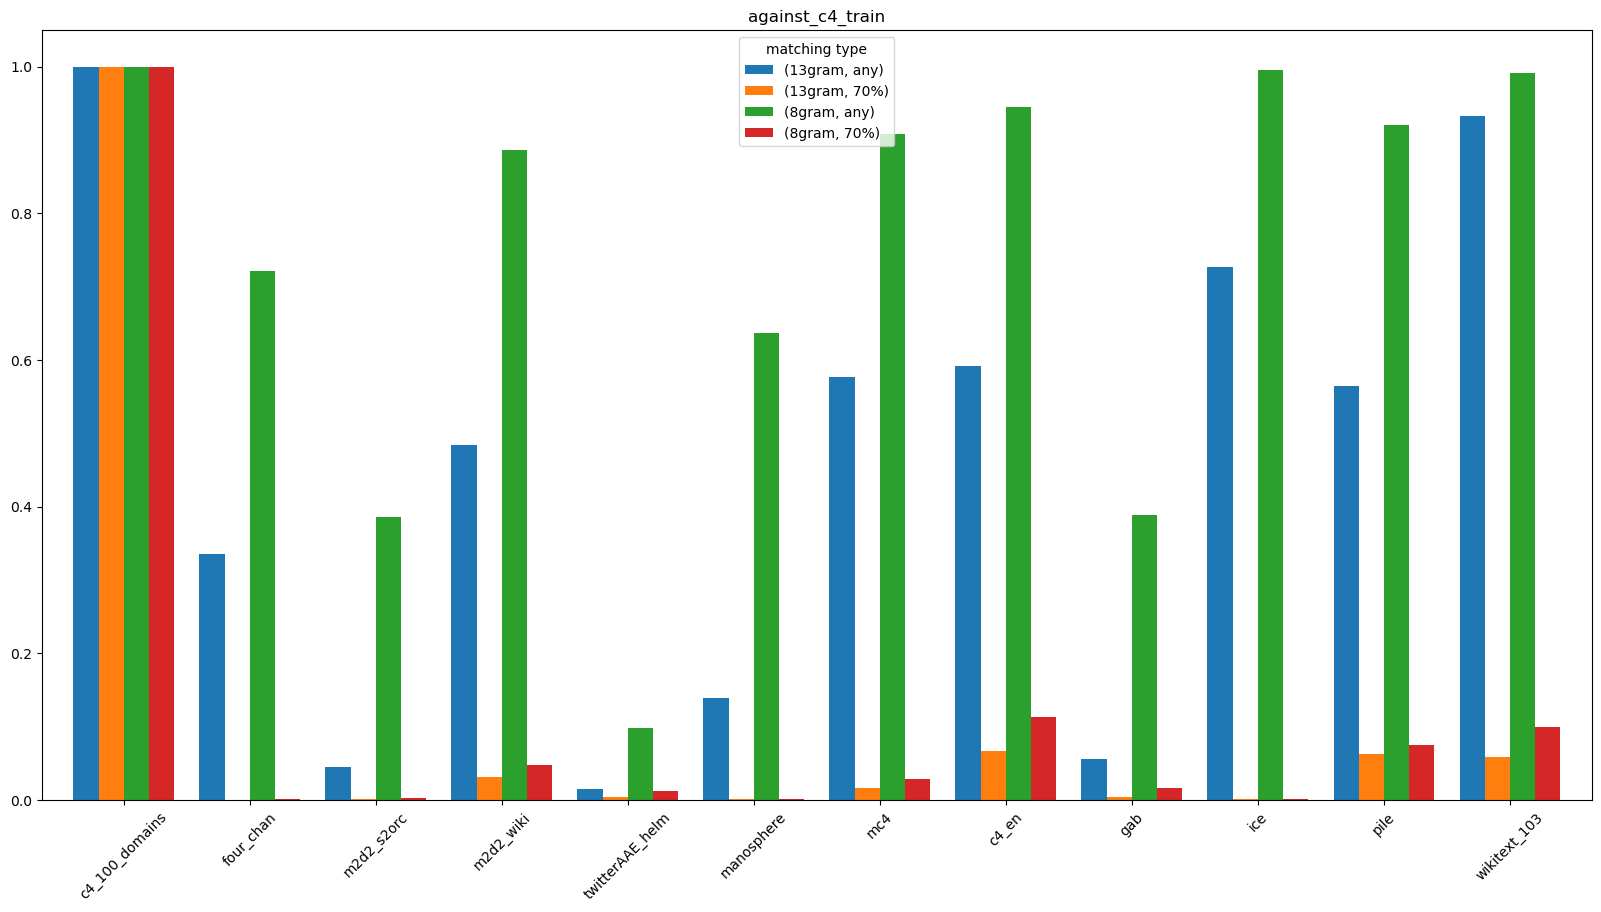

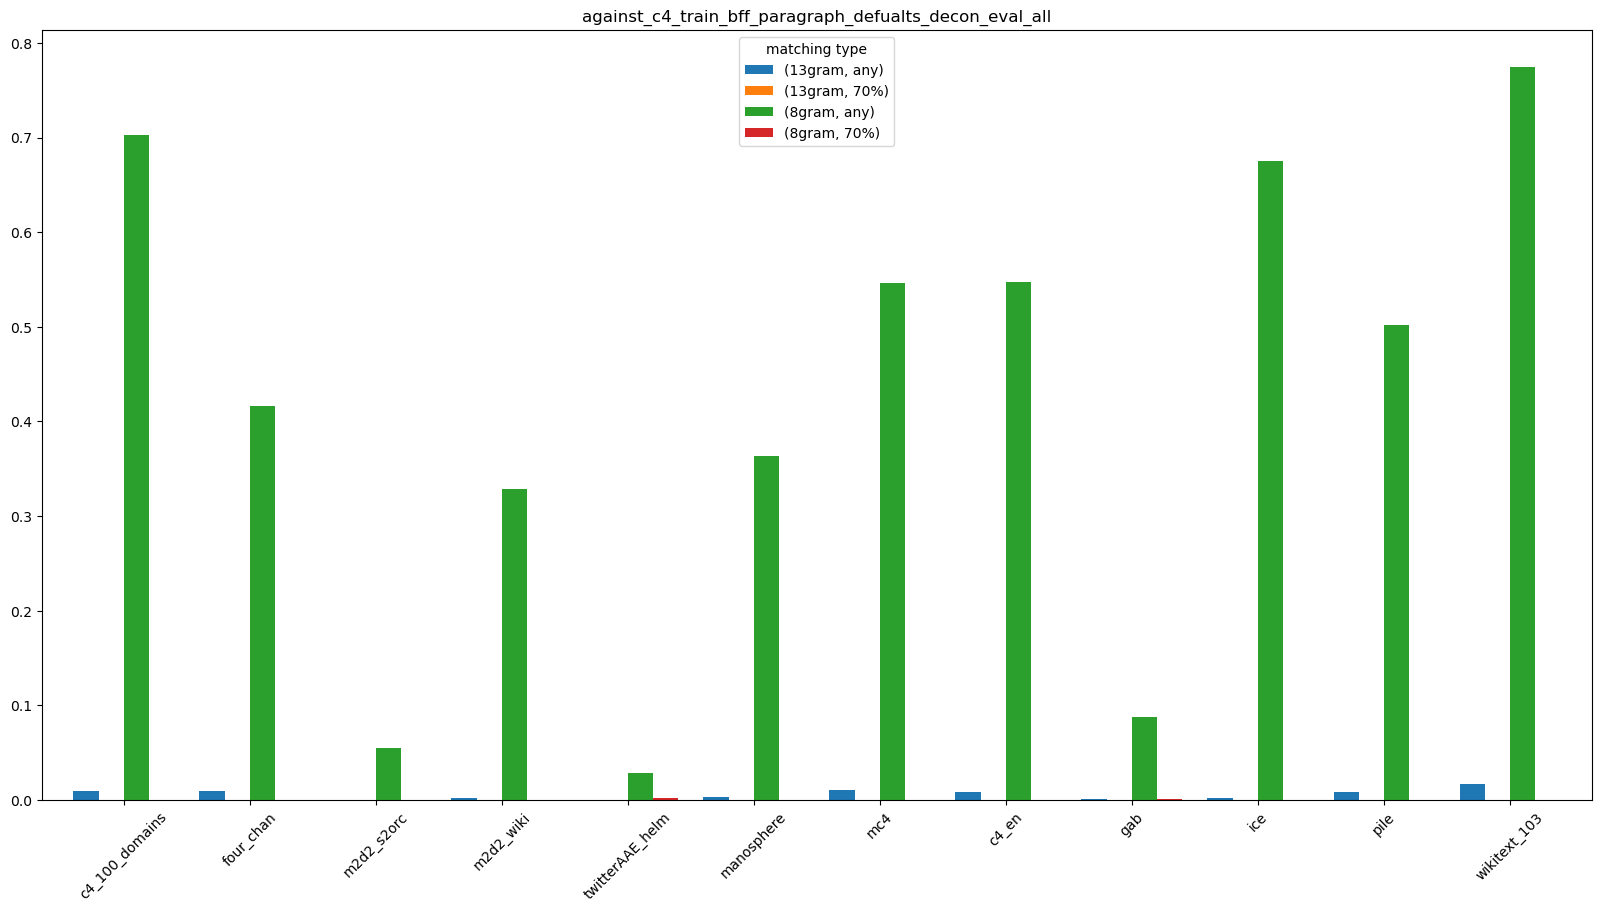

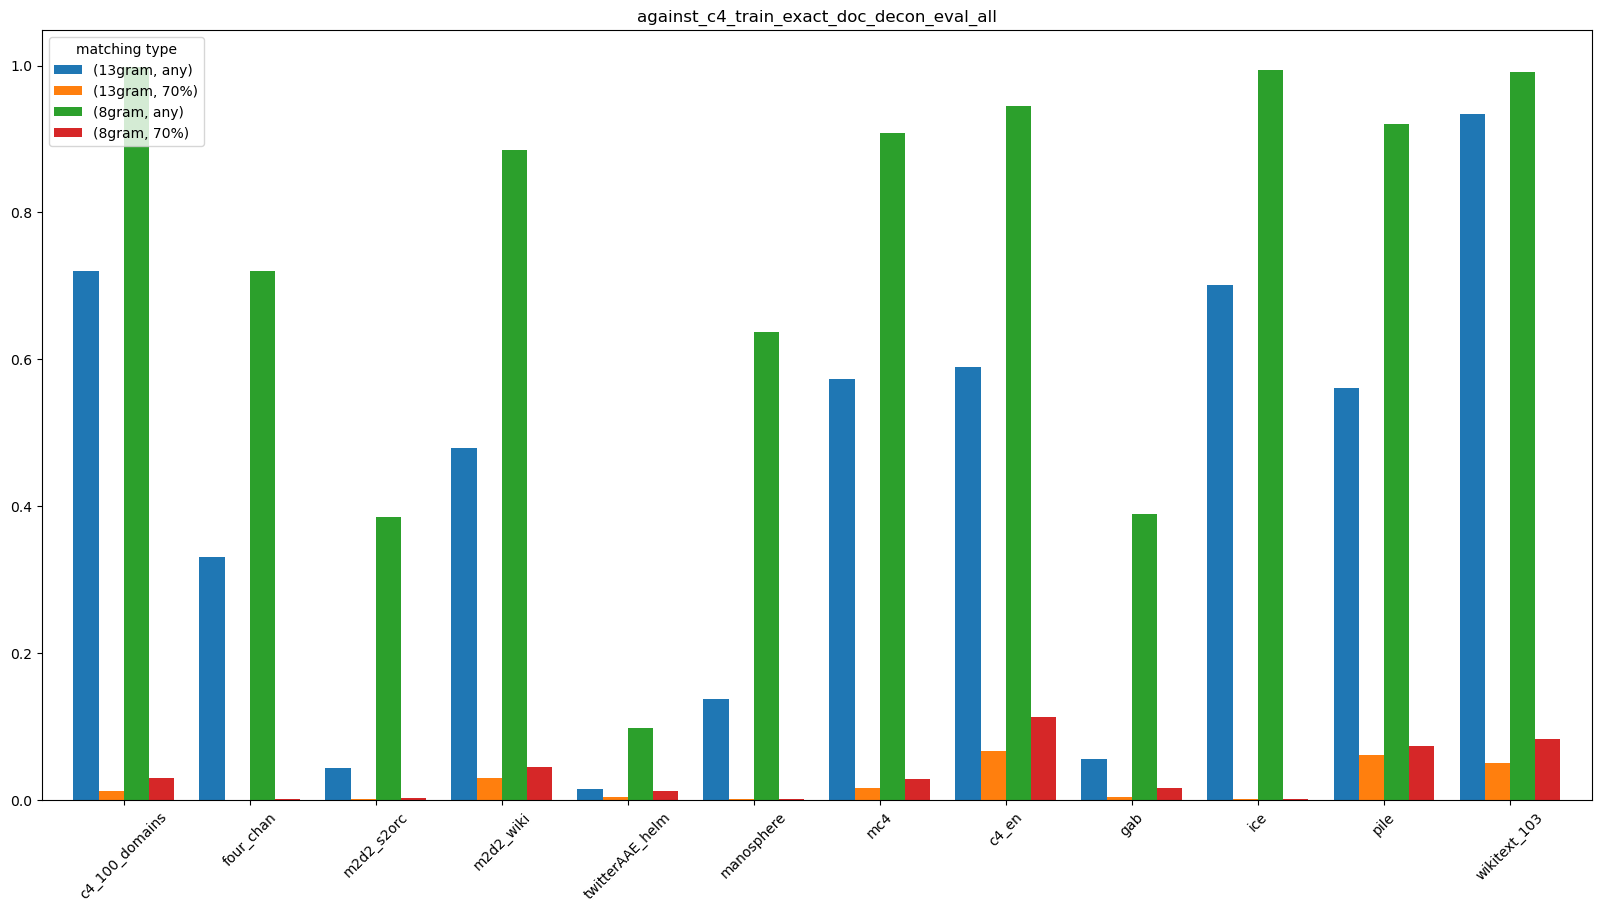

In [5]:
for data_decon_type in full_df.columns.levels[0]:
    if data_decon_type == 'against_c4_full_paragraph':
        continue
    ax = full_df[data_decon_type].plot.bar(width=0.8, rot=45, figsize=(20,10), title=data_decon_type)
    ax.legend(title='matching type')

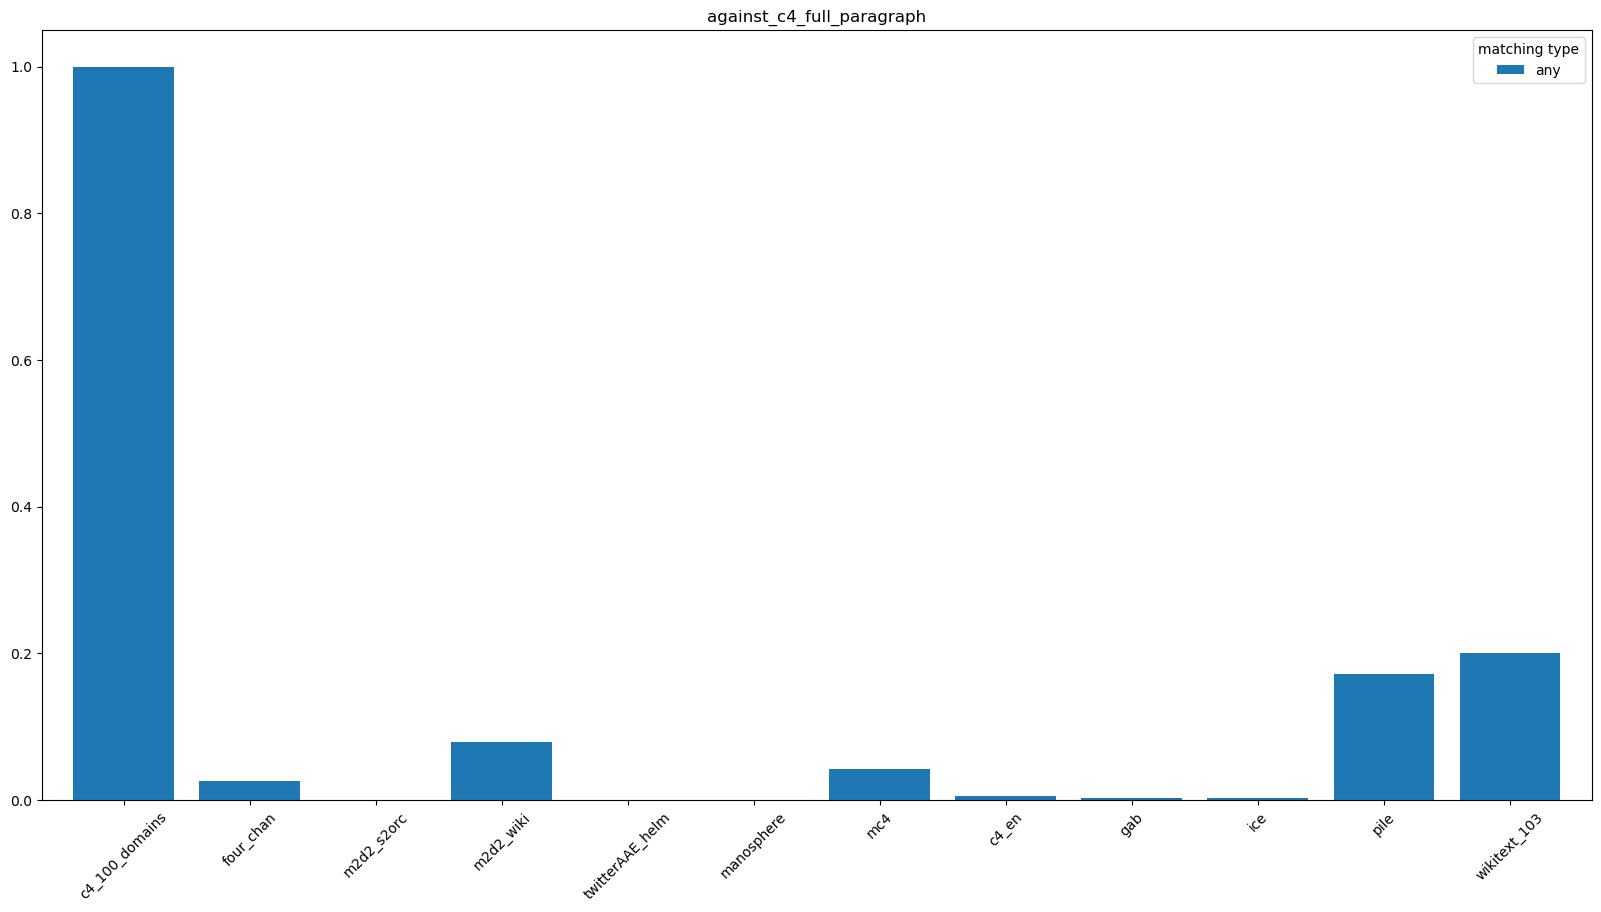

In [9]:

ax = full_df['against_c4_full_paragraph']['13gram']['any'].plot.bar(width=0.8, rot=45, figsize=(20,10), title=data_decon_type)
ax.legend(title='matching type')